# **Gowtham G** #
# **GRIP @ The Sparks Foundation** #
# **Task 1 : Prediction using Supervised ML** #



# **Predicting Student Percentage Scores** #



The problem described is a regression task where the goal is to predict a student's percentage score based on the number of hours they have studied. In this context, we have a dataset that includes two columns: "Hours" and "Scores." The "Hours" column represents the number of hours a student has studied, and the "Scores" column represents the corresponding percentage score the student achieved in an exam.

The dataset you provided is a sample of such data, and it consists of pairs of hours studied and the respective percentage 


#### AIM : To predict the percentage score of a student based on the number of study hours. ####






.                                 ![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSL2T9Ayh751R8x7Q0yeyycUApkB9oY3R6aiQ&usqp=CAU)

### **Importing the libears**

In [58]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

### **Load and Explore the Dataset** ###

In [59]:
# Load the dataset
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

# Display the first few rows of the dataset
df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [60]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [61]:
# Descriptive statistics of the dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [62]:
# Shape of the dataset (number of rows and columns)

df.shape

(25, 2)

In [63]:
# Check for null values in the dataset

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## **Exploratory Data Analysis** ##

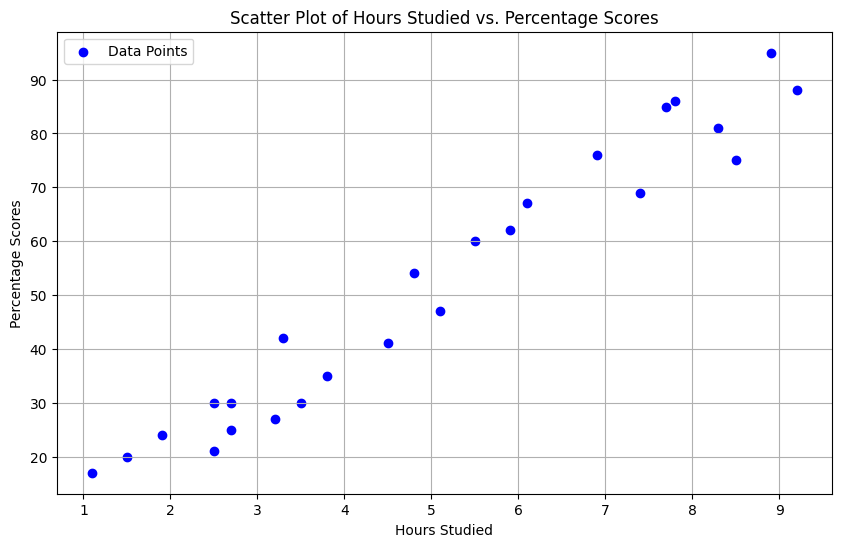

In [64]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Hours'], df['Scores'], c='blue', marker='o', label='Data Points')
plt.title('Scatter Plot of Hours Studied vs. Percentage Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.legend()
plt.grid(True)

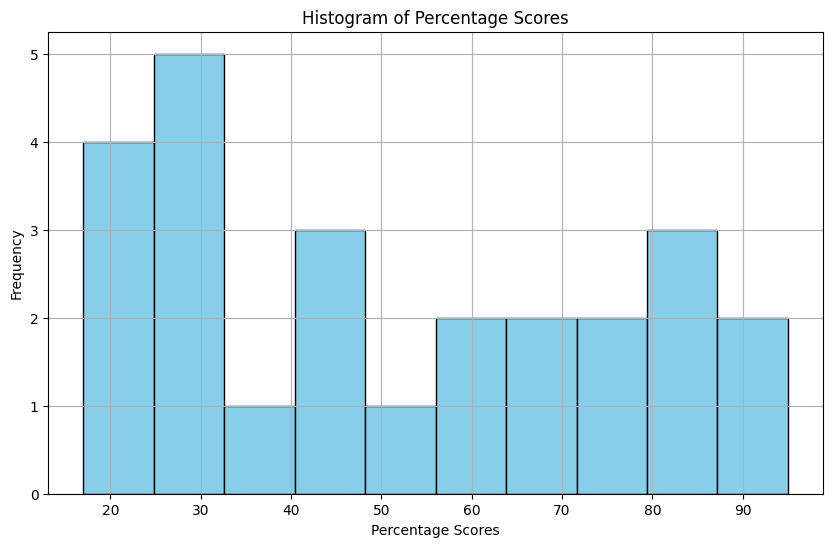

In [65]:
# Create a histogram of Percentage Scores
plt.figure(figsize=(10, 6))
plt.hist(df['Scores'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Percentage Scores')
plt.xlabel('Percentage Scores')
plt.ylabel('Frequency')
plt.grid(True)

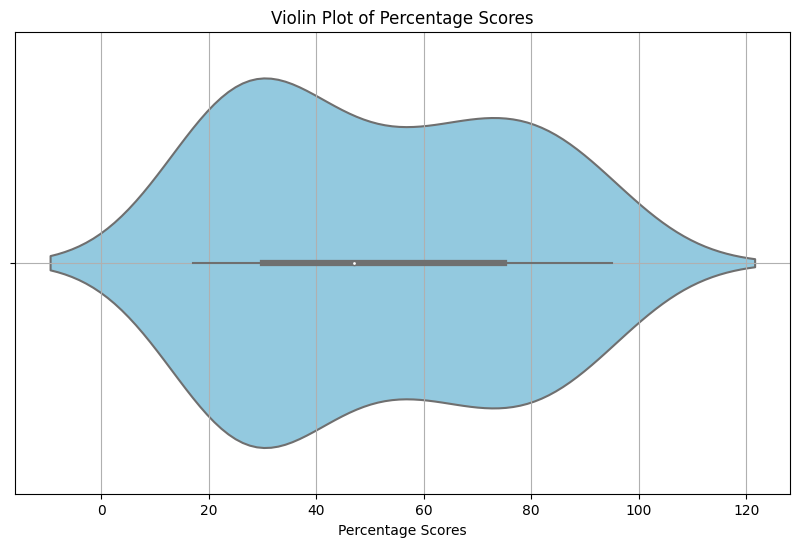

In [66]:
# Create a violin plot of Percentage Scores
plt.figure(figsize=(10, 6))
sns.violinplot(x='Scores', data=df, color='skyblue')
plt.title('Violin Plot of Percentage Scores')
plt.xlabel('Percentage Scores')
plt.grid(True)

### **Model Training** ##

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [67]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [68]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Model** ##

In [69]:
# Model training
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


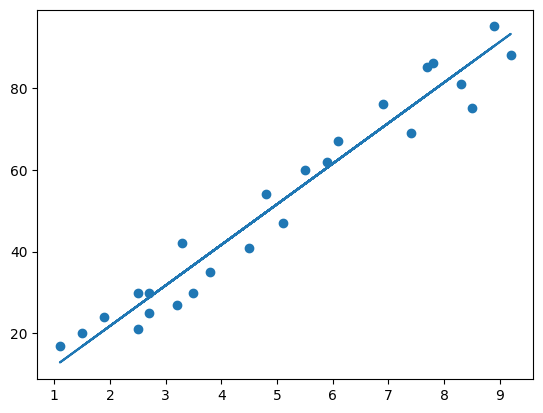

In [70]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## **Making Predictions** ##

In [71]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [72]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [73]:
#Manual test. test with your own data

hours = 9.25
predicted = regressor.predict([[hours]])
print("Number of hours =", hours)
print("Predicted score is =", predicted[0])


Number of hours = 9.25
Predicted score is = 93.69173248737539


### **Evaluating the model** ##

In [74]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
